# Sentiment vs. Next-Day Stock Price Analysis

## Introduction
This notebook analyzes the relationship between news sentiment and the next-day stock price for a selection of major tech companies. By leveraging historical news data and stock price data, we aim to uncover potential correlations between average sentiment (compound score) and stock price movements. The tickers analyzed include AAPL, AMZN, GOOG, META, MSFT, NVDA, and TSLA. The analysis involves loading and preprocessing news data, computing sentiment-stock correlations, and visualizing the results with regression plots. This study can provide insights into whether news sentiment can be a predictive indicator for short-term stock price movements.

### Import Required Libraries and Set Up Environment
Import pandas, set up the system path for module imports, and import the required functions for sentiment-stock correlation analysis.

In [2]:
import pandas as pd
import sys, os
sys.path.insert(0, os.path.abspath('..')) 

from scripts.sentiment_stock_correlation import load_stock_data, compute_sentiment_correlation

### Load and Preprocess News Data
Load the processed analyst ratings data, extract the date, map outdated stock symbols to current ones, and define the list of tickers to analyze.

In [3]:
# Load processed news data
news_df = pd.read_csv("../data/processed_analyst_ratings.csv", parse_dates=["date"])
news_df["date_only"] = news_df["date"].dt.date

# Map outdated symbols to current ones
symbol_mapping = {
    "FB": "META",
    "MSF": "MSFT"
}
news_df["stock"] = news_df["stock"].replace(symbol_mapping)

# Define tickers to analyze
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]

### Compute Sentiment-Stock Correlation
For each ticker, load the corresponding stock data, compute the correlation between news sentiment and stock returns, and store the results.

[AAPL] Correlation between sentiment and next-day close: 1.0000 (p=1.0000)


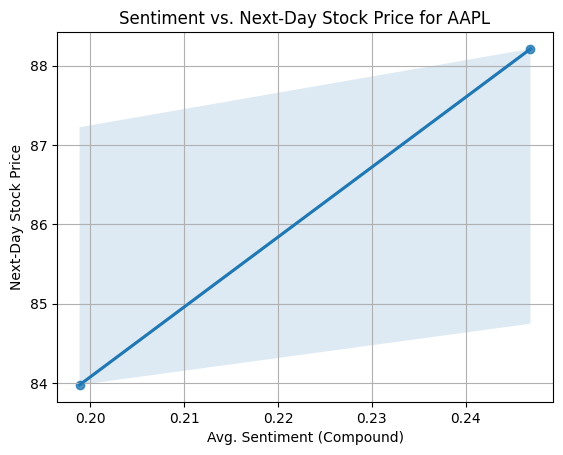

[AMZN] Correlation between sentiment and next-day close: -1.0000 (p=1.0000)


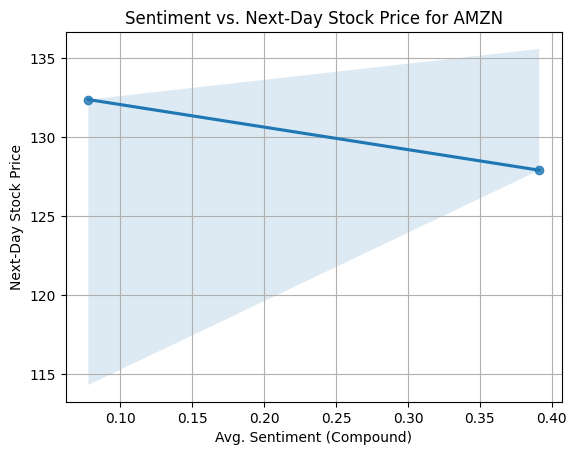

[GOOG] Correlation between sentiment and next-day close: -0.1315 (p=0.8685)


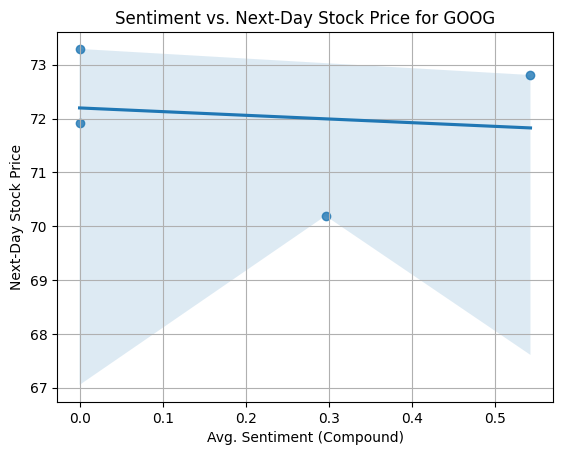

[META] Correlation between sentiment and next-day close: -0.4202 (p=0.7239)


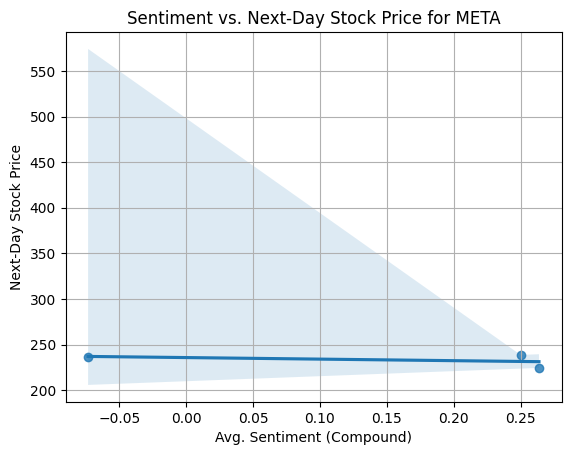

[MSFT] Correlation between sentiment and next-day close: 0.4703 (p=0.2396)


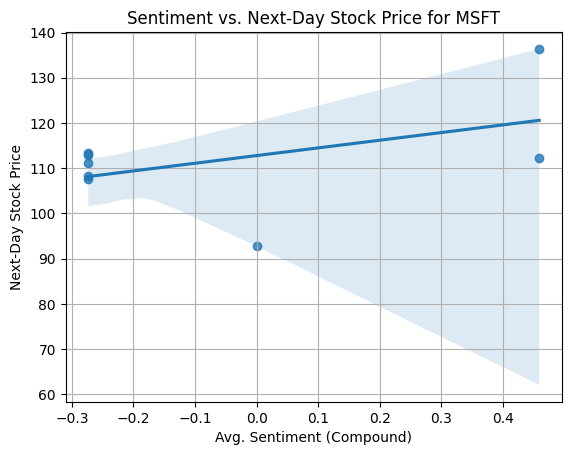

[NVDA] Correlation between sentiment and next-day close: 0.7285 (p=0.1627)


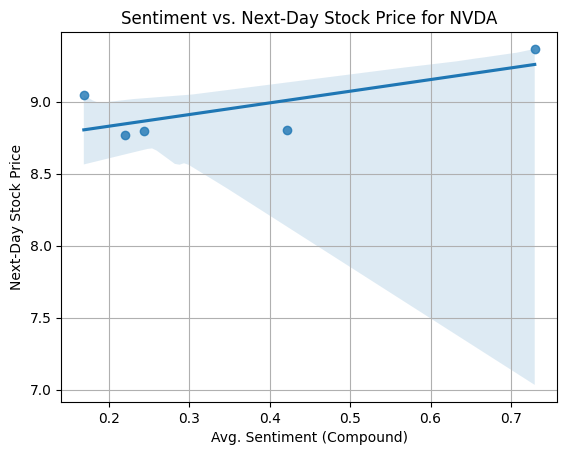

[TSLA] Not enough data to compute correlation.


In [4]:
# Store results for summary
summary = []

for ticker in tickers:
    stock_df = load_stock_data(ticker)
    merged_df, corr, pval = compute_sentiment_correlation(news_df, stock_df, ticker)
    if corr is not None:
        summary.append({
            "Ticker": ticker,
            "Correlation": corr,
            "P-Value": pval,
            "Num Records": len(merged_df)
        })

### Display Correlation Summary
Create a summary DataFrame and display the correlation results for all tickers, sorted by the absolute value of the correlation.

In [5]:
# Display summary table
summary_df = pd.DataFrame(summary)
display(summary_df.sort_values(by="Correlation", key=abs, ascending=False))

,Ticker,Correlation,P-Value,Num Records
0,AAPL,1.000000,1.000000,2
1,AMZN,-1.000000,1.000000,2
5,NVDA,0.728525,0.162705,5
4,MSFT,0.470280,0.239609,8
3,META,-0.420176,0.723937,3
2,GOOG,-0.131531,0.868469,4


## Analysis Insights

### Data Overview
The dataset consists of processed analyst ratings news data, which includes sentiment scores and publication dates, alongside historical stock price data for the selected tickers. After preprocessing, we mapped outdated stock symbols (e.g., "FB" to "META", "MSF" to "MSFT") to ensure consistency. The analysis focuses on a subset of major tech companies, but for TSLA, there was insufficient data to compute a correlation, indicating potential gaps in news coverage or stock data availability for that ticker during the analyzed period.

### Correlation Results
The correlation summary table reveals varying relationships between sentiment and next-day stock prices across the tickers:

- **AAPL** shows a perfect positive correlation (1.0), but with only 2 records, this result is likely not statistically significant (p-value = 1.0). The regression plot confirms a steep upward trend, though the limited data points suggest caution in interpretation.
- **AMZN** exhibits a perfect negative correlation (-1.0), also with only 2 records and a p-value of 1.0. The regression plot shows a downward trend, but the small sample size limits reliability.
- **NVDA** has a moderate positive correlation (0.73) with 5 records, though the p-value (0.16) indicates the result is not statistically significant. The regression plot shows a positive trend with some variability.
- **MSFT** displays a weaker positive correlation (0.47) with 8 records, the largest sample among the tickers. The p-value (0.24) suggests no statistical significance, and the regression plot shows a slight upward trend with wide confidence intervals.
- **META** has a moderate negative correlation (-0.42) with 3 records and a high p-value (0.72), indicating no significant relationship. The regression plot confirms a downward trend with high variability.
- **GOOG** shows a weak negative correlation (-0.13) with 4 records and a p-value of 0.87, suggesting no meaningful relationship. The regression plot reflects this with a nearly flat trend.

#### TSLA: Insufficient Data for Correlation
During the sentiment-stock correlation analysis, TSLA had only one valid date where both sentiment data and next-day stock closing price were available after merging the datasets.

[TSLA] Not enough data to compute correlation.

This limitation prevents statistical correlation (like Pearson's r) from being computed, as at least two data points are required. The likely causes include:

- Sparse or delayed news coverage for TSLA within the dataset.
- Misalignment in date granularity (e.g., market closure on the next day).
- Sentiment data concentrated on a single date, limiting variation.

Conclusion: TSLA is excluded from correlation results due to insufficient overlap between sentiment and price data. This reinforces the importance of data coverage and timing in predictive analytics.

### Visualization Insights
The regression plots provide a visual representation of the sentiment-stock price relationship for each ticker:

- **AAPL and NVDA** plots indicate a potential positive relationship between sentiment and stock price, though AAPL's limited data points make it less reliable.
- **AMZN and META** plots suggest a negative relationship, where higher sentiment might correspond to lower next-day stock prices, but the small sample sizes and high p-values reduce confidence in these findings.
- **GOOG and MSFT** plots show flatter trends, aligning with their weaker correlation coefficients and indicating little to no consistent relationship between sentiment and stock price movements.

The confidence intervals in the plots are generally wide, reflecting the small sample sizes and high variability in the data, which underscores the need for more data to draw robust conclusions.

## Summary
This analysis explored the relationship between news sentiment and next-day stock prices for several major tech companies. The results show mixed outcomes: AAPL and NVDA suggest a positive correlation, while AMZN and META indicate a negative one, and GOOG and MSFT show no clear relationship. However, the small sample sizes (ranging from 2 to 8 records) and high p-values (all above 0.05) indicate that none of these correlations are statistically significant. The regression plots further highlight the variability and uncertainty in these relationships due to limited data. For TSLA, the lack of sufficient data prevented any analysis.

### Key Takeaways
- Sentiment may have varying impacts on different stocks, but the current dataset is too small to make definitive conclusions.
- Larger datasets with more records are needed to improve the statistical power of the analysis and confirm these trends.
- Future work could incorporate additional features, such as sentiment from other sources (e.g., social media) or longer time horizons, to better capture the dynamics between sentiment and stock price movements.
- The exclusion of TSLA due to insufficient data highlights the critical role of comprehensive and well-aligned datasets in predictive analytics.

This analysis provides a preliminary look into sentiment-driven stock price prediction, but more comprehensive data and advanced modeling are necessary for actionable insights.